# Math 271.1: Exercise 2 (#2)

#### INSTRUCTION: Polynomial Regression (Quadratic) via Normal Equations and Cholesky Factorization <br>

(a) Derive the normal equations for the least squares solution. <br>
(b) Implement your own Cholesky factorization routine to solve the resulting equations. <br>
(c) Plot the observed data points (xi,yi) and the fitted quadratic curve on the same graph.

#### Importing Libraries needed

In [28]:
import numpy as np #for array operations and numeric computations
import matplotlib.pyplot as plt # for plotting the data and results

from IPython.display import display # for displaying arrays and matrices nicely

### (a) Deriving the normal equations

#### Initializing the dataset (observed data points)

- creates the input data (x) snd the output data (y)
- will be used to fit the quadratic regression model

In [29]:
x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_data = np.array([2.03, 4.02, 7.02, 10.45, 15.03,
                    20.60, 27.40, 35.35, 44.42, 54.38])

display(x_data, y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 2.03,  4.02,  7.02, 10.45, 15.03, 20.6 , 27.4 , 35.35, 44.42,
       54.38])

#### Build design matrix for quadratic model

- transforms data into the format needed for the quadratic regression
- we use each column to represent a term in the quadratic equation: β₀ + β₁x + β₂x²

In [30]:
n = len(x_data)
X = np.zeros((n, 3))
X[:, 0] = 1      # Column of ones
X[:, 1] = x_data      # x values
X[:, 2] = x_data**2   # x^2 values

display(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

In [ ]:
# Symmetric positive definite matrix required for Cholesky
XTX = X.T @ X
XTy = X.T @ y_data

display(XTX, XTy)

array([[1.0000e+01, 4.5000e+01, 2.8500e+02],
       [4.5000e+01, 2.8500e+02, 2.0250e+03],
       [2.8500e+02, 2.0250e+03, 1.5333e+04]])

array([  220.7 ,  1469.16, 10847.84])

### (b) Implementing Cholesky Factorization

#### Compute Cholesky factorization A = LL^T

In [ ]:
A = XTX

n = A.shape[0]
L = np.zeros((n, n))

for i in range(n):
    for j in range(i+1):
        if i == j:
            # Diagonal element
            sum_val = np.sum(L[i, :i]**2)
            L[i, i] = np.sqrt(A[i, i] - sum_val)
        else:
            # Off-diagonal element
            sum_val = np.sum(L[i, :j] * L[j, :j])
            L[i, j] = (A[i, j] - sum_val) / L[j, j]

display(L)

array([[ 3.16227766,  0.        ,  0.        ],
       [14.23024947,  9.08295106,  0.        ],
       [90.12491331, 81.74655956, 22.97825059]])

#### Solving for coefficients

- Uses forward substitution to solve Lz = X^T y
- Uses backward substitution to solve L^T β = z
- The resulting coefficients define the quadratic model


In [21]:
# Solve for beta
z = np.linalg.solve(L, XTy)
beta = np.linalg.solve(L.T, z)

print(f"β₀ = {beta[0]:.4f} (true: 2.0)")
print(f"β₁ = {beta[1]:.4f} (true: 1.5)")
print(f"β₂ = {beta[2]:.4f} (true: 0.5)")

β₀ = 2.3285 (true: 2.0)
β₁ = 1.1028 (true: 1.5)
β₂ = 0.5186 (true: 0.5)


### (c) Visualization: Plotting the coefficients and the fitted curve

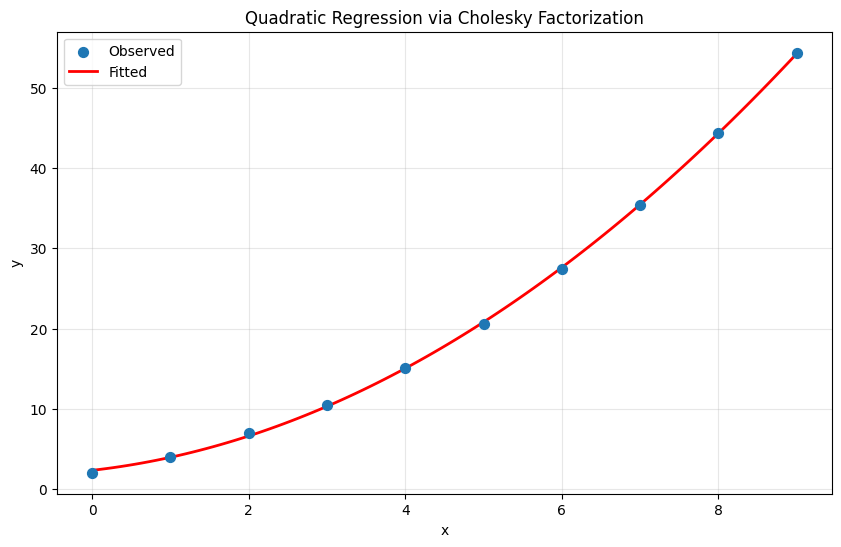

In [22]:
x_plot = np.linspace(0, 9, 100)
y_plot = beta[0] + beta[1]*x_plot + beta[2]*x_plot**2

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=50, label='Observed', zorder=3)
plt.plot(x_plot, y_plot, 'r-', linewidth=2, label='Fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Regression via Cholesky Factorization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
